## Get the dataset

<div class="alert alert-block alert-info">
We get our data on Kaggle, here are the links to the 2 CSV files : https://www.kaggle.com/datasets/thedevastator/drug-performance-evaluation?select=Drug.csv and https://www.kaggle.com/datasets/thedevastator/drug-performance-evaluation?select=Drug_clean.csv.
The datasets are scraped from https://www.webmd.com/ which contains a lot of information about health. 
    
Some information about the CSV files.


Drug.csv :
- Condition : The medical condition associated with the drug. (String)
- Drug : The name of the drug. (String)
- Indication : The purpose of the drug. (String)
- Type : The type of drug (generic or brand). (String)
    - RX : medical prescription
    - OTC : a medicine that can be bought without a prescription
- Reviews : The number of reviews associated with the drug. (Integer) (object in csv)
- Effective : The effectiveness of the drug based on customer reviews. (Integer)
- EaseOfUse : The ease of use of the drug based on customer reviews. (Integer)
- Satisfaction : The satisfaction level of the drug based on customer reviews. (Integer)
- Information : Other relevant information about the drug. (String)


Drug_clean.csv :
- Condition : The medical condition associated with the drug. (String)
- Drug : The name of the drug. (String)
- Indication : The purpose of the drug. (String)
- Type : The type of drug (generic or brand). (String)
- Reviews : The number of reviews associated with the drug. (Integer)
- Effective : The effectiveness of the drug based on customer reviews. (Integer)
- EaseOfDrug : The ease of use of the drug based on customer reviews. (Integer)
- Satisfaction : The satisfaction level of the drug based on customer reviews. (Integer)
- Form : The form of the drug (e.g. tablet, capsule, etc.). (String)
- Price : The average price of the drug. (Float)
</div>

<div class="alert alert-block alert-warning">
After reading these datasets we think that it could be interesting to understand on what the satisfaction is based. 
</div>

# 📚Import librairies

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import seaborn as sns
import math
from collections import Counter
import streamlit as st
import altair as alt
import plotly.express as px

ImportError: DLL load failed while importing lib: La procédure spécifiée est introuvable.

# 💾Load datasets

### Read csv files

In [2]:
drug = pd.read_csv("data/Drug.csv", sep=";", header=1) #first dataset
drug_clean = pd.read_csv("data/Drug_clean.csv", sep=";", header=1) #second dataset

<div class="alert alert-block alert-info">
Sometimes we get a memory error, if so we need to execute these lines. 
</div>

In [3]:
drug = pd.read_csv("data/Drug.csv", sep=";", header=1, low_memory=False) #first dataset
drug_clean = pd.read_csv("data/Drug_clean.csv", sep=";", header=1, low_memory=False) #second dataset

<div class="alert alert-block alert-info">
When we open the datasets in Excel we see that the second row is the name avec the columns so we put this row as header. The first row is the number of columns, we can forget this line. The delimiter used as default by pandas is ",", but here we need to modify it with ";".
</div>

In [4]:
drug.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,\r\n\t\t\t\t\tLevofloxacin is used to treat a ...
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,\r\n\t\t\t\t\t This is a generic drug. The ave...
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,\r\n\t\t\t\t\tAzithromycin is an antibiotic (m...


In [5]:
drug_clean.head()

,Condition,Drug,EaseOfUse,Effective,Form,Indication,Price,Reviews,Satisfaction,Type
0,Acute Bacterial Sinusitis,Amoxicillin,3.852353,3.655882,Capsule,On Label,12.590000,86.294118,3.197647,RX
1,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.470000,3.290000,Liquid (Drink),Off Label,287.370000,43.000000,2.590000,RX
2,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,3.121429,2.962857,Tablet,On Label,70.608571,267.285714,2.248571,RX
3,Acute Bacterial Sinusitis,Ampicillin,2.000000,3.000000,Capsule,On Label,12.590000,1.000000,1.000000,RX
4,Acute Bacterial Sinusitis,Ampicillin,3.250000,3.000000,Tablet,On Label,125.240000,15.000000,3.000000,RX


### Get info about the datasets

In [6]:
# datasets shape
print(f"drug dataset shape is {drug.shape}")
print(f"drug_clean dataset shape is {drug_clean.shape}")

drug dataset shape is (2219, 9)
drug_clean dataset shape is (685, 10)


In [7]:
# datasets columns
print(f"columns of the drug dataset are {drug.columns}")
print(f"columns of the drug_clean dataset are {drug_clean.columns}")

columns of the drug dataset are Index(['Condition', 'Drug', 'Indication', 'Type', 'Reviews', 'Effective',
       'EaseOfUse', 'Satisfaction', 'Information'],
      dtype='object')
columns of the drug_clean dataset are Index(['Condition', 'Drug', 'EaseOfUse', 'Effective', 'Form', 'Indication',
       'Price', 'Reviews', 'Satisfaction', 'Type'],
      dtype='object')


<div class="alert alert-block alert-info">  
"Information" is in the first dataset only and "Price" and "Form" are only in the second dataset. After reading some of the rows in 'Information', we know that some information about the price and the form are written there.
</div>

In [8]:
# get infos (name, number of non-null and type of colums)
print(drug.info())
print(drug_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     2219 non-null   object 
 1   Drug          2219 non-null   object 
 2   Indication    2219 non-null   object 
 3   Type          2219 non-null   object 
 4   Reviews       2219 non-null   object 
 5   Effective     2219 non-null   float64
 6   EaseOfUse     2219 non-null   float64
 7   Satisfaction  2219 non-null   float64
 8   Information   2219 non-null   object 
dtypes: float64(3), object(6)
memory usage: 156.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     685 non-null    object 
 1   Drug          685 non-null    object 
 2   EaseOfUse     685 non-null    float64
 3   Effective     685 non-null    float64

<div class="alert alert-block alert-info">  
We can see that the type column "Reviews" is not the same, we have float64 and object.</div>

In [9]:
print(drug.describe())
print(drug_clean.describe())

         Effective    EaseOfUse  Satisfaction
count  2219.000000  2219.000000   2219.000000
mean      3.557972     3.958824      3.218774
std       1.113128     1.037877      1.230933
min       1.000000     1.000000      1.000000
25%       3.000000     3.540000      2.400000
50%       3.680000     4.100000      3.130000
75%       4.330000     5.000000      4.000000
max       5.000000     5.000000      5.000000
        EaseOfUse   Effective         Price      Reviews  Satisfaction
count  685.000000  685.000000    685.000000   685.000000    685.000000
mean     3.920038    3.523530    174.211183    82.644410      3.195699
std      0.894212    0.954126    667.743466   273.281398      1.030442
min      1.000000    1.000000      4.000000     1.000000      1.000000
25%      3.556667    3.000000     15.490000     3.000000      2.575000
50%      4.050000    3.600000     49.990000    10.350877      3.200000
75%      4.500000    4.110000    145.990000    57.000000      3.901250
max      5.000000 

<div class="alert alert-block alert-info">
If we look in detail into the common columns we can see that the statistics  are similar which is a good thing. It means that the info are coherent.
</div>

# ⚒️Pre-processing

<div class="alert alert-block alert-info">
We need to clean the two datasets in order to merge them.
</div>

### 'Reviews' column

<div class="alert alert-block alert-info">
Let's begin with the column 'Reviews'.
We need to clean these columns so they can be the same type.

We think that the best way to do it is to delete the word 'Reviews' and transform the floats into integers as it is written in the description of the datasets. We will have to change the type of the column.
</div>

In [10]:
print("before pre-processing")
print(drug.Reviews[0:5])
print(drug_clean.Reviews[6:11])

print("\nNow let's split the object type (default separator is any whitespace) and keep the first part which is the number. To make sure, we are going to set the type as 'int' for both of the datasets.\n")
drug['Reviews'] = drug['Reviews'].apply(lambda x : int(x.split()[0]))    
drug = drug.astype({"Reviews": int})
drug_clean = drug_clean.astype({"Reviews": int})

print("after pre-processing")
print(drug.Reviews[0:5])
print(drug_clean.Reviews[6:11])

before pre-processing
0    994 Reviews
1    994 Reviews
2    755 Reviews
3    584 Reviews
4    584 Reviews
Name: Reviews, dtype: object
6     490.000000
7     141.600000
8      41.000000
9       3.666667
10      5.666667
Name: Reviews, dtype: float64

Now let's split the object type (default separator is any whitespace) and keep the first part which is the number. To make sure, we are going to set the type as 'int' for both of the datasets.

after pre-processing
0    994
1    994
2    755
3    584
4    584
Name: Reviews, dtype: int32
6     490
7     141
8      41
9       3
10      5
Name: Reviews, dtype: int32


In [11]:
print(drug.Reviews.describe())
print(drug_clean.Reviews.describe())

count    2219.000000
mean       74.227129
std       245.467102
min         1.000000
25%         1.000000
50%         6.000000
75%        43.000000
max      4647.000000
Name: Reviews, dtype: float64
count     685.000000
mean       82.477372
std       273.280223
min         1.000000
25%         3.000000
50%        10.000000
75%        57.000000
max      4647.000000
Name: Reviews, dtype: float64


<div class="alert alert-block alert-info">
We can see that the two columns are pretty similar statistically.
</div>

<div class="alert alert-block alert-success">  
The column 'Reviews' is now well cleaned.    
</div>

### 'Information' column

<div class="alert alert-block alert-info">
Now let's focus on the 'Information' column. We can get the price (also calculate a discount) and the form of the drug.
</div>

In [12]:
print(f"There are {drug['Information'].nunique()} different values in 'Information' column")

There are 421 different values in 'Information' column


<div class="alert alert-block alert-info">
Let's see how many prices by row we can get.
</div>

In [13]:
def number_of_prices(row):
    for c in ["\r", "\t", "\n"] : row['Information']=row['Information'].replace(c, "").strip()
    price = len(re.findall("\$(\d+\.\d*)", row['Information']))
    return row['Information'], price

drug[['Information','Nb_Prices']] = drug.apply(number_of_prices, axis=1, result_type='expand')
print(f"The number of prices we can get is in {drug['Nb_Prices'].unique()}")
print(drug['Nb_Prices'].describe())

drug_clean['Nb_Prices'] = 1

The number of prices we can get is in [2 1 0]
count    2219.000000
mean        1.863452
std         0.351235
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Nb_Prices, dtype: float64


<div class="alert alert-block alert-info">  
We can see that we can get 0, 1 or 2 prices by row. We decide to create 2 columns with the first price in 'Price' (same name as the other dataset) and the second price in 'Price2'. The column(s) will be set to NaN if there is only one price or none. We decide to not set the price at 0 because it will bias the statistics. We also add a column named 'Nb_Prices' in the second dataset and set every rows at 1.
</div>

In [14]:
def get_new_info(row):
    prices = re.findall("\$(\d+\.\d*)", row['Information'])
    if len(prices) == 2:
        price1 = float(prices[0])
        price2 = float(prices[1])
        discount = round((1-(price2/price1)) * 100, 2)
    elif len(prices) == 1:
        price1 = float(prices[0])
        price2 = np.nan
        discount = np.nan
    elif len(prices) == 0:
        price1 = np.nan
        price2 = np.nan
        discount = np.nan
        
    return price1, price2, discount

drug[['Price', 'Price2', 'Discount(%)']] = drug.apply(get_new_info, axis=1, result_type='expand')

In [15]:
print(drug['Price'].describe())
print(drug_clean['Price'].describe())

count     2213.000000
mean       111.189584
std        489.581768
min          2.590000
25%         11.990000
50%         20.620000
75%         79.460000
max      10362.190000
Name: Price, dtype: float64
count      685.000000
mean       174.211183
std        667.743466
min          4.000000
25%         15.490000
50%         49.990000
75%        145.990000
max      10362.190000
Name: Price, dtype: float64


<div class="alert alert-block alert-info">
After we print the statistics of 'Price' for both of the datasets we can see that they are similar. We can see that we get 2213 over 2219 prices for the first dataset. 
</div>

In [16]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     2219 non-null   object 
 1   Drug          2219 non-null   object 
 2   Indication    2219 non-null   object 
 3   Type          2219 non-null   object 
 4   Reviews       2219 non-null   int32  
 5   Effective     2219 non-null   float64
 6   EaseOfUse     2219 non-null   float64
 7   Satisfaction  2219 non-null   float64
 8   Information   2219 non-null   object 
 9   Nb_Prices     2219 non-null   int64  
 10  Price         2213 non-null   float64
 11  Price2        1922 non-null   float64
 12  Discount(%)   1922 non-null   float64
dtypes: float64(6), int32(1), int64(1), object(5)
memory usage: 216.8+ KB


<div class="alert alert-block alert-info">
We can see that the 3 new columns have been well added to the dataset and that there are 1922 drugs with a discount available.
</div>

<div class="alert alert-block alert-success">  
Now we have the price(s) and the discount.
</div>

<div class="alert alert-block alert-info">  
Let's get the form of the drug. First let's get an idea of what forms exist in the dataset where they are provided.
</div>

In [17]:
print(f"The form of drug can be {drug_clean['Form'].unique()}")

The form of drug can be ['Capsule' 'Liquid (Drink)' 'Tablet' 'Cream' 'Liquid (Inject)' 'Other']


<div class="alert alert-block alert-info">  
We see that there are 6 types of form. We did not exclude that it can be others in the other dataset. Now we are going to search these types in the 'Information' column. To avoid syntax errors, we decide to apply .lower() to the types of form and the 'Information' column.
</div>

In [18]:
drug_clean['Form'] = drug_clean['Form'].str.lower()
forms = list(drug_clean['Form'].unique())
print(f"Let's search for these forms : {forms}")

Let's search for these forms : ['capsule', 'liquid (drink)', 'tablet', 'cream', 'liquid (inject)', 'other']


<div class="alert alert-block alert-danger">  
We think that the value 'other' is ambiguous and we should not search for it. Here is one critical example : "Tacrolimus is used with other medications to prevent rejection of a kidney....", we don't want to count it. We delete 'other' of the array that we iterate through and create a list for saving the index of the row where no form is found.
</div>

In [19]:
#let's delete 'other'
forms.pop(-1)

found_forms = []

def get_forms2(row):
    for f in forms:
        if f in row['Information']:
            found_forms.append(f)
            return f

    return np.nan
        
drug['Form'] = drug.apply(get_forms2, axis=1, result_type='expand')

found_forms = list(set(found_forms))
print(f"We found {len(found_forms)} forms of drugs")

We found 3 forms of drugs


<div class="alert alert-block alert-info">
Only 3 forms of drugs have been found in the column. Let's see which ones.
</div>

In [20]:
drug['Form'].unique()

array([nan, 'tablet', 'cream', 'capsule'], dtype=object)

<div class="alert alert-block alert-info">
We have seen that we only get tablet, capsule and cream forms. We'll have to deal with the other forms.
To get them, we are going to use regex to find every word written after an integer and a whitespace. In the first time, we are just going to create a Counter object. The latter will provides the number of occurrences of each of the word found. If there are few words, then we will be able to treat them manually and keep the ones we want.
</div>

In [21]:
array_forms = []

def get_new_forms(row):
    result = re.findall(r"\d(\s\w*)", row['Information'])
    [array_forms.append(item_result.strip()) for item_result in result if (item_result not in array_forms) and (len(result) != 0)]
        
drug[drug['Form'].isnull()].apply(get_new_forms, axis=1, result_type='expand')

c = Counter(array_forms)
print(c.most_common())

[('by', 1886), ('Tablet', 824), ('Tube', 235), ('Bottle', 209), ('Capsule', 171), ('Box', 40), ('Vial', 38), ('Solution', 27), ('Hour', 23), ('suppository', 21), ('Can', 13), ('Suspension', 10), ('Syringe', 10), ('patch', 10), ('at', 7), ('Pen', 7), ('medications', 6), ('', 5), ('each', 5), ('Package', 5), ('packet', 4), ('Jar', 3), ('kit', 2), ('ingredients', 2), ('days', 2), ('Inhaler', 2), ('aerosol', 2), ('Implant', 1)]


In [22]:
print(f"There are {drug[drug['Form'].isnull()].shape[0]} rows without any forms (at np.nan)")

There are 1892 rows without any forms (at np.nan)


<div class="alert alert-block alert-info">
We found 897 rows without any forms (among tablet, capsule and cream). With the counter, we can see that the total is bigger than 897, it means that it can be more than one form per row. We can see that some of the words found can easily be forgotten, for example "by", "", "days", "at", "each" and "ingredients". Let's delete them and count the occurrences of all the other words.
</div>

In [23]:
for to_delete in ["by", "", "days", "at", "each", "ingredients"]:
    array_forms = list(filter((to_delete).__ne__, array_forms))
c = Counter(array_forms)
print(c.most_common())

[('Tablet', 824), ('Tube', 235), ('Bottle', 209), ('Capsule', 171), ('Box', 40), ('Vial', 38), ('Solution', 27), ('Hour', 23), ('suppository', 21), ('Can', 13), ('Suspension', 10), ('Syringe', 10), ('patch', 10), ('Pen', 7), ('medications', 6), ('Package', 5), ('packet', 4), ('Jar', 3), ('kit', 2), ('Inhaler', 2), ('aerosol', 2), ('Implant', 1)]


<div class="alert alert-block alert-info">
At the end, we decide to keep all of the other words and do an .apply() to the dataset to write the form. As we said before, it exists many cases where there are multiple forms of drugs, to keep it simple we will just keep the first type of form written.
</div>

In [24]:
found_forms = []
new_forms = [i[0] for i in c.most_common()]

def get_new_forms(row):
    try: 
        if np.isnan(row['Form']) :
            for f in new_forms:
                if f in row['Information']:
                    found_forms.append(f)
                    return f
            return np.nan

    except:
        return row['Form']
        
drug['Form'] = drug.apply(get_new_forms, axis=1, result_type='expand')

print(f"At the end we have multiple types of forms : {drug['Form'].unique()}")

At the end we have multiple types of forms : ['Tablet' 'Bottle' 'tablet' nan 'Capsule' 'Vial' 'Suspension' 'Solution'
 'Tube' 'Can' 'cream' 'Box' 'Jar' 'medications' 'Syringe' 'Implant'
 'capsule' 'Package' 'Pen' 'Inhaler']


In [25]:
print(f"There are {drug[drug['Form'].isnull()].shape[0]} rows without any forms (np.nan)")

There are 290 rows without any forms (np.nan)


<div class="alert alert-block alert-info">
After this, only 6 rows did not have any form. We keep in mind that we want to merge the first dataset with the second one. Several rows in the column 'Form' can be modified to be merged. For example, tube -> cream, bottle -> liquid (drink) etc.
</div>

In [26]:
def modify_form_columns(row):
    if 'tube' == row['Form']:
        return 'cream'
            
    elif 'bottle' == row['Form']:
        return 'liquid (drink)'
    elif 'vial' == row['Form']:
        return 'liquid (drink)'
    elif 'solution' == row['Form']:
        return 'liquid (drink)'
            
    elif 'can' == row['Form']:
        return 'other'
    elif 'box' == row['Form']:
        return 'other'
        

    else:
        return row['Form']

drug['Form'] = drug.apply(modify_form_columns, axis=1, result_type='expand')

<div class="alert alert-block alert-info">
Let's print all the types of forms in the datatset that we have.
</div>

In [27]:
Counter(drug['Form'])

Counter({'Tablet': 824,
         'Bottle': 209,
         'tablet': 319,
         nan: 290,
         'Capsule': 171,
         'Vial': 38,
         'Suspension': 10,
         'Solution': 27,
         'Tube': 235,
         'Can': 13,
         'cream': 2,
         'Box': 40,
         'Jar': 3,
         'medications': 7,
         'Syringe': 10,
         'Implant': 1,
         'capsule': 6,
         'Package': 5,
         'Pen': 7,
         'Inhaler': 2})

<div class="alert alert-block alert-success">
Now the 'Form' column is well cleaned.
</div>

### Datasets merge

In [28]:
all_drugs = pd.concat([drug, drug_clean])
all_drugs.shape

(2904, 14)

In [29]:
all_drugs.columns

Index(['Condition', 'Drug', 'Indication', 'Type', 'Reviews', 'Effective',
       'EaseOfUse', 'Satisfaction', 'Information', 'Nb_Prices', 'Price',
       'Price2', 'Discount(%)', 'Form'],
      dtype='object')

<div class="alert alert-block alert-info">
We can see that the datasets are well merged, we have the original columns plus the 3 new columns (Nb_Prices, Price2 and Discount(%)). Let's delete all duplicated rows if needed.
</div>

In [30]:
all_drugs.drop_duplicates(inplace=True)
all_drugs.shape

(2438, 14)

<div class="alert alert-block alert-info">
We can see that more or less 500 rows are duplicates.
</div>

In [31]:
all_drugs.describe()

,Reviews,Effective,EaseOfUse,Satisfaction,Nb_Prices,Price,Price2,Discount(%)
count,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2432.000000,1521.000000,1521.000000
mean,69.556604,3.535610,3.934260,3.184218,1.621411,136.090165,82.485917,47.451453
std,241.159349,1.077032,1.004022,1.173949,0.490184,573.427349,422.773462,21.832341
min,1.000000,1.000000,1.000000,1.000000,0.000000,2.590000,2.640000,0.270000
25%,2.000000,3.000000,3.502500,2.440000,1.000000,12.110000,7.180000,31.030000
50%,7.000000,3.670000,4.070000,3.134000,2.000000,28.990000,13.500000,50.930000
75%,39.000000,4.250000,4.670000,4.000000,2.000000,99.590000,44.820000,63.380000
max,4647.000000,5.000000,5.000000,5.000000,2.000000,10362.190000,8689.950000,91.940000


In [32]:
all_drugs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2438 entries, 0 to 684
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Condition     2438 non-null   object 
 1   Drug          2438 non-null   object 
 2   Indication    2438 non-null   object 
 3   Type          2438 non-null   object 
 4   Reviews       2438 non-null   int32  
 5   Effective     2438 non-null   float64
 6   EaseOfUse     2438 non-null   float64
 7   Satisfaction  2438 non-null   float64
 8   Information   1753 non-null   object 
 9   Nb_Prices     2438 non-null   int64  
 10  Price         2432 non-null   float64
 11  Price2        1521 non-null   float64
 12  Discount(%)   1521 non-null   float64
 13  Form          2213 non-null   object 
dtypes: float64(6), int32(1), int64(1), object(6)
memory usage: 276.2+ KB


<div class="alert alert-block alert-info">
Now that we have merged ours datasets, we can create a final csv file.
</div>

In [33]:
if not os.path.exists("data/final_drug.csv"):
    all_drugs.to_csv("data/final_drug.csv", index=False)

In [34]:
final_drug = pd.read_csv("data/final_drug.csv", low_memory=False)

In [35]:
final_drug.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information,Nb_Prices,Price,Price2,Discount(%),Form
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84,levofloxacin is used to treat a variety of bac...,2,172.99,47.08,72.78,tablet
1,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755,2.78,3.00,2.08,this is a generic drug. the average cash price...,2,74.99,34.89,53.47,liquid (drink)
2,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,azithromycin is an antibiotic (macrolide-type)...,2,32.10,12.48,61.12,tablet
3,Acute Bacterial Sinusitis,Amoxicillin-Pot Clavulanate,On Label,RX,437,3.26,3.23,2.42,amoxicillin/clavulanic acid is a combination p...,1,20.62,NaN,NaN,other
4,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,361,2.44,2.96,1.68,levofloxacin is used to treat a variety of bac...,2,172.99,47.08,72.78,tablet


# 📊Data visualization 

<div class="alert alert-block alert-info">
Now that we have a cleaned csv file, we can analyse it and start get anwsers. First, let's calculate the correlation heatmap to see if there are any correlations between 'Satisfaction' and other variables.
</div>

In [38]:
sns.heatmap(final_drug.corr(numeric_only=True), annot=True, linewidth=.5)

TypeError: corr() got an unexpected keyword argument 'numeric_only'

<div class="alert alert-block alert-info">
With the heatmap we can see that the satisfaction is strongly linked to the effectivness of the drug and its ease of use. It's an information coherent, the more the effectivness is high, happier the patient is. It is also true if it is easy to take the drug (by eating or drinking it for example).
Let's see their relationship.</div>

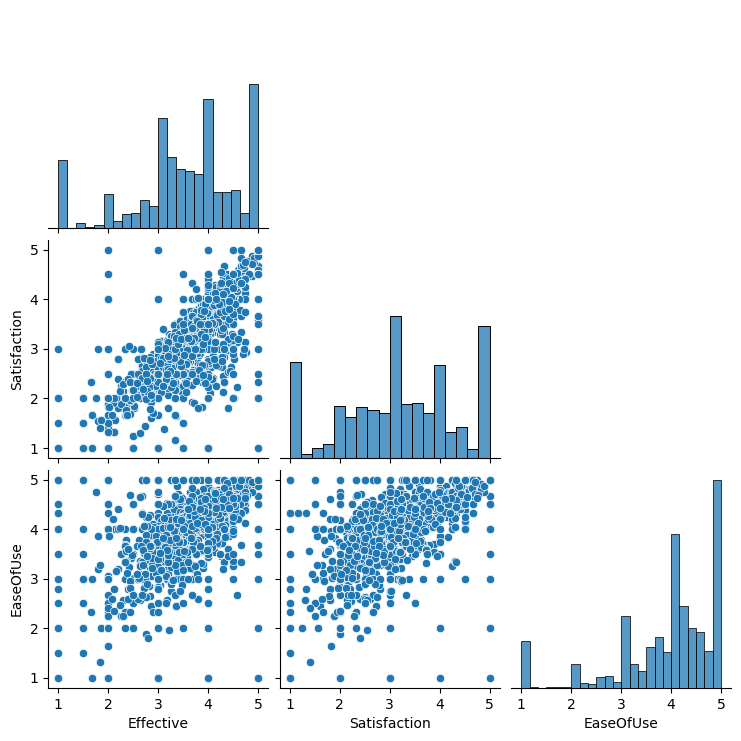

In [39]:
sns.pairplot(final_drug[['Effective', 'Satisfaction', 'EaseOfUse']], corner=True)
plt.show()

<div class="alert alert-block alert-info">
We can see that the relationship between the Satisfaction and the Effective is close to an affine function (same for EaseOfUse and Satisfaction). We can draw it with the regplot function from seaborn.
</div>

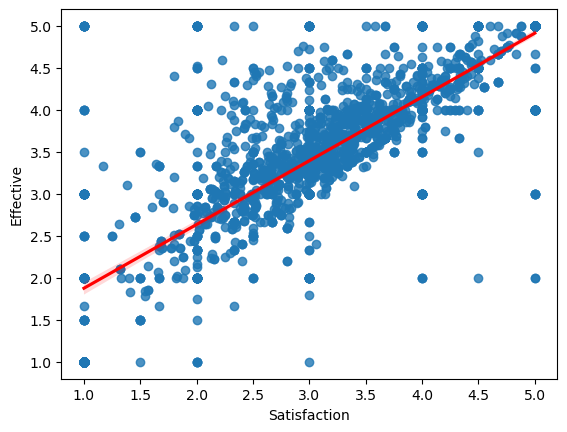

In [41]:
sns.regplot(x=final_drug['Satisfaction'], y=final_drug['Effective'], line_kws={"color": "red"})
plt.show()

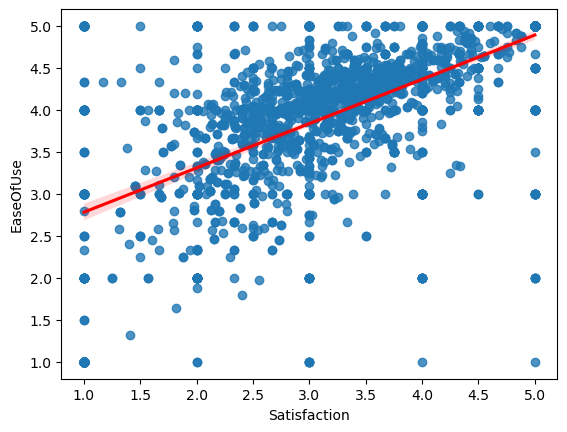

In [42]:
sns.regplot(x=final_drug['Satisfaction'], y=final_drug['EaseOfUse'], line_kws={"color": "red"})
plt.show()

<div class="alert alert-block alert-info">
To sum up, the Satisfaction is correlated to Effective and EaseOfUse values and we know that with the value of one of it, we can get a pretty close idea of the Satisfaction. What if we use a machine learning model to predict a new value of Satisfaction ?
</div>

# 🚂Training a model

<div class="alert alert-block alert-info">
To train our model, we need to decide which columns will be the inputs and the target. We know that the Satisfaction is very correlated with the Effective and EaseOfUse of the drug but if we use them as input it will be too simple for the model to predict the Satisfaction. We decide to keep them as inputs and add 'Reviews' and 'Price'. The target is 'Satisfaction'.
</div>

In [43]:
sub_df = final_drug[['Effective', 'EaseOfUse', 'Reviews', 'Price', 'Satisfaction']].copy()
sub_df.describe()

,Effective,EaseOfUse,Reviews,Price,Satisfaction
count,2438.000000,2438.000000,2438.000000,2432.000000,2438.000000
mean,3.535610,3.934260,69.556604,136.090165,3.184218
std,1.077032,1.004022,241.159349,573.427349,1.173949
min,1.000000,1.000000,1.000000,2.590000,1.000000
25%,3.000000,3.502500,2.000000,12.110000,2.440000
50%,3.670000,4.070000,7.000000,28.990000,3.134000
75%,4.250000,4.670000,39.000000,99.590000,4.000000
max,5.000000,5.000000,4647.000000,10362.190000,5.000000


<div class="alert alert-block alert-info">
In the 'Price' column we can see that the maximum value is ~10k dollars and 75% of the values are around 100 dollars. Let's plot the histogram of this column.
</div>

<Axes: ylabel='Frequency'>

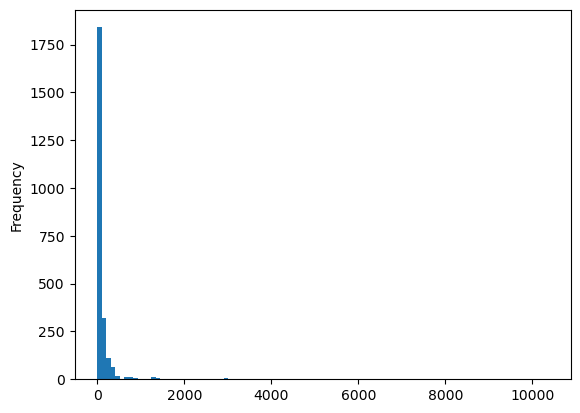

In [44]:
sub_df['Price'].plot.hist(bins=100)

<div class="alert alert-block alert-info">
With the plot we can see that the majority of the values are between 0 and 500. There are few outliers above 500, we will drop them to avoid poor performance.
</div>

In [45]:
sub_df = sub_df.drop(sub_df[sub_df['Price']>500].index)
sub_df.describe()

,Effective,EaseOfUse,Reviews,Price,Satisfaction
count,2358.000000,2358.000000,2358.000000,2352.000000,2358.000000
mean,3.534862,3.943833,70.618321,68.398719,3.184949
std,1.073084,0.995792,244.576505,86.906316,1.172079
min,1.000000,1.000000,1.000000,2.590000,1.000000
25%,3.000000,3.550000,2.000000,11.990000,2.450000
50%,3.670000,4.070000,7.000000,26.990000,3.137000
75%,4.250000,4.670000,39.750000,86.990000,4.000000
max,5.000000,5.000000,4647.000000,477.990000,5.000000


In [46]:
print(sub_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2358 entries, 0 to 2437
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Effective     2358 non-null   float64
 1   EaseOfUse     2358 non-null   float64
 2   Reviews       2358 non-null   int64  
 3   Price         2352 non-null   float64
 4   Satisfaction  2358 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 110.5 KB
None


<div class="alert alert-block alert-info">
Let's drop the rows with NaN values.
</div>

In [47]:
sub_df = sub_df.dropna(axis=0)
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2437
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Effective     2352 non-null   float64
 1   EaseOfUse     2352 non-null   float64
 2   Reviews       2352 non-null   int64  
 3   Price         2352 non-null   float64
 4   Satisfaction  2352 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 110.2 KB


<div class="alert alert-block alert-info">
Now that we have cleaned the columns needed for our training, we can define the model's inputs (called the features) and output (called the target).
</div>

In [48]:
features = sub_df[['Effective', 'EaseOfUse', 'Reviews', 'Price']]
target = sub_df['Satisfaction']

<div class="alert alert-block alert-info">
Let's split our data into train dataset and test dataset. We keep 80% of the data for training and the 20% remaining for the test.
</div>

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(f"Shape of train features : {X_train.shape} and train labels : {y_train.shape}")
print(f"Shape of test features : {X_test.shape} and test labels : {y_test.shape}")

Shape of train features : (1881, 4) and train labels : (1881,)
Shape of test features : (471, 4) and test labels : (471,)


<div class="alert alert-block alert-info">
To avoid any biais in the training we will normalize the data.
</div>

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

print("Before normalization (mean of train dataset):")
print(np.mean(X_train, axis=0))
scaler_X.fit(X_train)
scaler_y.fit(np.array(y_train).reshape(-1, 1))
X_train = scaler_X.transform(X_train)
y_train = scaler_y.transform(np.array(y_train).reshape(-1, 1))
print("After normalization (mean of train dataset):")
print(np.mean(X_train, axis=0))

print("------------------------------------")
print("Before normalization (mean of test dataset):")
print(np.mean(X_test, axis=0))
X_test = scaler_X.transform(X_test)
y_test = scaler_y.transform(np.array(y_test).reshape(-1, 1))
print("After normalization (mean of test dataset):")
print(np.mean(X_test, axis=0))

Before normalization (mean of train dataset):
Effective     3.535467
EaseOfUse     3.946488
Reviews      70.190324
Price        69.837811
dtype: float64
After normalization (mean of train dataset):
[0.63386681 0.73662202 0.01489245 0.14145522]
------------------------------------
Before normalization (mean of test dataset):
Effective     3.531447
EaseOfUse     3.935465
Reviews      73.118896
Price        62.651517
dtype: float64
After normalization (mean of test dataset):
[0.63286165 0.73386613 0.01552279 0.12633891]


<div class="alert alert-block alert-info">
Before creating a "sophisticated" model we will just imagine that we have a simple one which predict the mean of the target datatest. Let's calculate it and then calculate the RMSE betwen the mean and the target.
</div>

In [51]:
from sklearn.metrics import mean_squared_error

metrics = {}
y_mean = np.repeat(np.mean(y_test), y_test.shape[0])
mse_baseline = mean_squared_error(y_test, y_mean)
rmse_baseline = np.sqrt(mse_baseline)
metrics['baseline'] = rmse_baseline
print("----------Baseline model----------")
print("RMSE between the y_test and its mean is : {:.2f}".format(rmse_baseline))

----------Baseline model----------
RMSE between the y_test and its mean is : 0.30


<div class="alert alert-block alert-info">
With our baseline model, the RMSE is 0.30. Let's remind that RMSE=0 is equal to a perfect adjustment of the data (predicted values = target values).
Here we treat a regression problem : the satisfaction can be explained by other variables. The most common model in regression is the linear regression. Let's try it.
</div>

In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
metrics['LinearRegression'] = rmse
r2 = model.score(X_test, y_test)

print("----------Linear Regression----------")
print("RMSE: {:.2f}".format(rmse))
print("R^2 Score: {:.2f}".format(r2))

----------Linear Regression----------
RMSE: 0.17
R^2 Score: 0.66


<div class="alert alert-block alert-info">
With the linear regression we get a RMSE of 0.17, almost half of the previous model. The R² score is 0.66 (the best value is 1) which means that the model is doing well. Let's try another commom model in regression : the decision tree model, to see if it performs better with our data.
</div>

In [53]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
# print([(y_predicted[i], y_test.iloc[i]) for i in range(len(y_test))])
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
metrics["DecisionTreeRegressor"] = rmse

print("----------Decision Tree Regressor----------")
print("RMSE: {:.2f}".format(rmse))

----------Decision Tree Regressor----------
RMSE: 0.20


<div class="alert alert-block alert-info">
Our decision tree gets a RMSE of 0.19, which is not better than the previous model (linear regression). There is a parameter that we can adjust easily : the depth of the model. Previously we did not fix it, by default nodes are expanded until all leaves are pure or until all leaves contain less than 2 samples, which can increase the memory consumption. Sklearn proposes a very usefull tool : GridSearchCV. It provides exhaustive search over specified parameter values for an estimator, here the depth of our decision tree. We will search the best depth between 2 and 10.
</div>

In [56]:
from sklearn.model_selection import GridSearchCV

pgrid = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid=pgrid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)
y_predicted = grid_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
metrics[f'DecisionTreeRegressor{grid_search.best_params_}'] = rmse


print(f"----------Decision Tree Regressor {grid_search.best_params_}----------")
print("RMSE: {:.2f}".format(rmse))
print(grid_search.best_params_)

----------Decision Tree Regressor {'max_depth': 4}----------
RMSE: 0.17
{'max_depth': 4}


<div class="alert alert-block alert-info">
Thanks to the GridSearchCV the RMSE is now at 0.17 with a decision tree depth of 4. Let's see how evolve the RMSE through the different model used.
</div>

In [63]:
fig = px.line(metrics.values(), x=metrics.keys(), y=metrics.values(), title='RMSE of different models', markers=True)
fig.show()

NameError: name 'px' is not defined

<div class="alert alert-block alert-info">
We can see that the use of a machine learning model help to reduce the RMSE. We can conclude that the linear regression model from sklearn is the best with RMSE=0.17.
</div>

In [61]:
condition = 'vertigo'
criteria = 'Satisfaction'

from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.transform import jitter
from bokeh.palettes import Turbo256
from bokeh.transform import factor_cmap


# create sub dataframe with only 'Satisfaction' column and the drug associated with the Condition asked
sub_df = final_drug.loc[final_drug['Condition']==condition, [criteria, 'Drug']].set_index('Drug')
# print(sub_df.head())

# drugs list
drugs = sub_df.index.unique().tolist()

source = ColumnDataSource(data=sub_df)

p = figure(y_range=drugs, height=600, width=900, title=f"Satisfaction level of drug (condition: {condition})", toolbar_location='below')

k = math.floor(len(Turbo256)/len(drugs))
palette = [Turbo256[i*k] for i in range(len(drugs))]

index_cmap = factor_cmap('Drug', palette=palette, 
                         factors=sorted(drugs))
p.hex(x=criteria, y=jitter('Drug', width=0.8, range=p.y_range), source=source, alpha=0.7, size=7,
     fill_color=index_cmap, line_color=None)

p.x_range.range_padding = 0
p.ygrid.grid_line_color = "#efefef"
p.xaxis.axis_label = criteria
p.yaxis.axis_label = 'Drug'

show(p)

# 🕹️Interactive diagram

<div class="alert alert-block alert-info">
We create an interactive diagram to measure the satisfaction level of drugs depending on the condition chosen. Run the following cell to deploy the local app.
</div>

In [62]:
! streamlit run main.py

Traceback (most recent call last):
  File "C:\Users\Kevin\anaconda3\Scripts\streamlit-script.py", line 6, in <module>
    from streamlit.cli import main
  File "C:\Users\Kevin\anaconda3\lib\site-packages\streamlit\__init__.py", line 55, in <module>
    from streamlit.delta_generator import DeltaGenerator as _DeltaGenerator
  File "C:\Users\Kevin\anaconda3\lib\site-packages\streamlit\delta_generator.py", line 38, in <module>
    from streamlit import config, cursor, env_util, logger, runtime, type_util, util
  File "C:\Users\Kevin\anaconda3\lib\site-packages\streamlit\cursor.py", line 18, in <module>
    from streamlit.runtime.scriptrunner import get_script_run_ctx
  File "C:\Users\Kevin\anaconda3\lib\site-packages\streamlit\runtime\__init__.py", line 16, in <module>
    from streamlit.runtime.runtime import Runtime as Runtime
  File "C:\Users\Kevin\anaconda3\lib\site-packages\streamlit\runtime\runtime.py", line 28, in <module>
    from streamlit.runtime.app_session import AppSession
  